# Intro to Machine Learning with scikit-learn

## About me - Ted Petrou

* Author 
    * Pandas Cookbook
    * [Exercise Python][1]
    * [Master Data Analysis with Python][2]
    * [Master Machine Learning with Python][3]
* Founder of [Dunder Data][4]
* Author of [Dexplo and Dexplot][5]


[1]: https://www.dunderdata.com/exercise-python
[2]: https://www.dunderdata.com/master-data-analysis-with-python
[3]: https://www.dunderdata.com/master-machine-learning-with-python
[4]: https://dunderdata.com
[5]: https://github.com/dexplo

## Topics

* What is machine learning?
* Exploratory data analysis
* Modeling by hand
* The scikit-learn Estimator
* Different regression estimators
* Cross validation
* Grid search

## Learning vs Machine Learning

### What is Learning?
Learning is the ability to improve at a **task**. Learning is done by animals, humans, and some machines.

### What is a task?
A task is a clearly defined piece of work.

### Measuring task performance
Learning happens when the person or machine improves its performance at completing the task. 

### What is Machine Learning?
Machine learning is often defined as the ability of a machine to learn (to improve on a specific task) without being explicitly programmed to do so.

### What is "not explicitly programmed"?
Not updated by a human

### The two types of machine learning
* **supervised** - have labels (ground truth)
* **unsupervised** - no labels

### Regression vs Classification
* **regression** - continuous value labels
* **classification** - discrete labels


## Terminology

![][1]


## Assessing task performance
Objectively quantifiable measure of performance

### Assessing regression task performance
Minimize error

[1]: images/terminology.png

## Ames Housing Data

* [Famous beginners Kaggle competition][0] compiled by professor Dean De Cock from Ames, Iowa from 2006 - 2010
* Original dataset has 79 features and 1460 samples
* For simplicity, we will only look at 8 features
* Predict sale price
* Evaluation metric - minimize squared error

[0]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### Read in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv('data/housing_sample.csv')
housing.head()

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,223500
3,Crawfor,Wd Sdng,1915,60.0,1717,642,3,1,140000
4,NoRidge,VinylSd,2000,84.0,2198,836,4,2,250000


### Data dictionary

Open up the [data dictionary for these columns][0] in a separate tab and read through the column descriptions.

[0]: data/housing_sample_data_dictionary.txt

## Exploratory data analysis

Gain an understanding of the data without the use of formal modeling.

* Relies heavily on visualization
* Begin with univariate analysis
    * Categorical features (limited, known, discrete values)
        * Frequency of occurrence of each value
    * Continuous features ()
        * Summary statistics (min, max, mean, median, std, etc...)
        * Distribution plots (boxplot, histogram, KDE)
* Relationship with target
    * Compare each feature with target
    * Categorical features
        * Mean sale price by category
    * Continuous features
        * Scatterplot of feature vs sale price
        * Bin feature and take mean per bin
        * Correlation vs sale price
* Multivariate analysis
    * All categorical features - crosstabulation, pivot table with sales price
    * All continuous - scatterplots
    * Mix of categorical and continuous - distribution plot by group

### Basic information on data

* Number of features and observations
* Data type of each column
* Number of missing values per column

In [3]:
housing.shape

(1460, 9)

In [4]:
housing.dtypes

Neighborhood     object
Exterior1st      object
YearBuilt         int64
LotFrontage     float64
GrLivArea         int64
GarageArea        int64
BedroomAbvGr      int64
FullBath          int64
SalePrice         int64
dtype: object

In [5]:
housing.isna().sum()

Neighborhood      0
Exterior1st       0
YearBuilt         0
LotFrontage     259
GrLivArea         0
GarageArea        0
BedroomAbvGr      0
FullBath          0
SalePrice         0
dtype: int64

### Univariate analysis

Begin with categorical columns

* Neighborhood
* Exterior1st
* BedroomAbvGr
* FullBath

In [6]:
categorical_cols = ['Neighborhood', 'Exterior1st', 'BedroomAbvGr', 'FullBath']

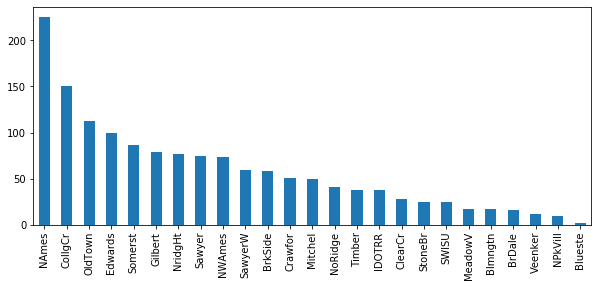

In [7]:
housing['Neighborhood'].value_counts().plot(kind='bar', figsize=(10, 4));

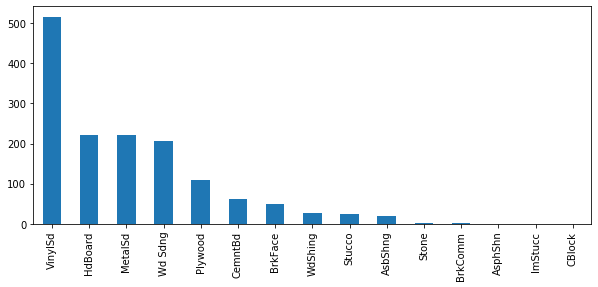

In [8]:
housing['Exterior1st'].value_counts().plot(kind='bar', figsize=(10, 4));

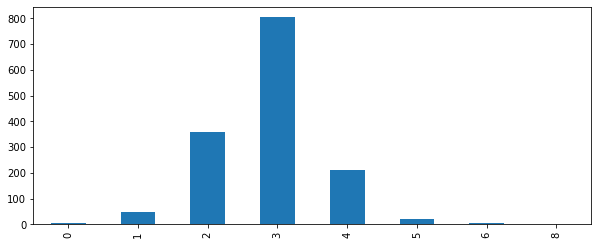

In [9]:
housing['BedroomAbvGr'].value_counts().sort_index().plot(kind='bar', figsize=(10, 4));

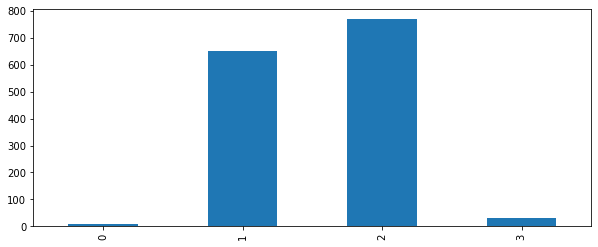

In [10]:
housing['FullBath'].value_counts().sort_index().plot(kind='bar', figsize=(10, 4));

### Continuous columns


* YearBuilt	
* LotFrontage	
* GrLivArea	
* GarageArea

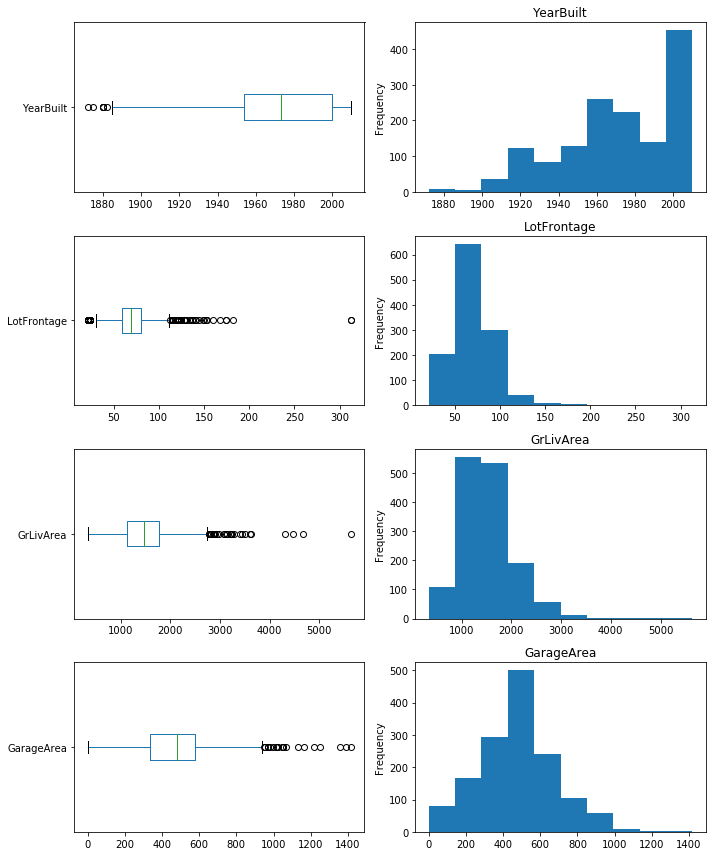

In [11]:
continuous_cols = ['YearBuilt', 'LotFrontage', 'GrLivArea', 'GarageArea']
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
for i, col in enumerate(continuous_cols):
    housing[col].plot(kind='box', vert=False, ax=axes[i, 0]);
    axes[i, 1] = housing[col].plot(kind='hist', ax=axes[i, 1], title=col);
fig.tight_layout()

### Relationship with target

Categorical columns

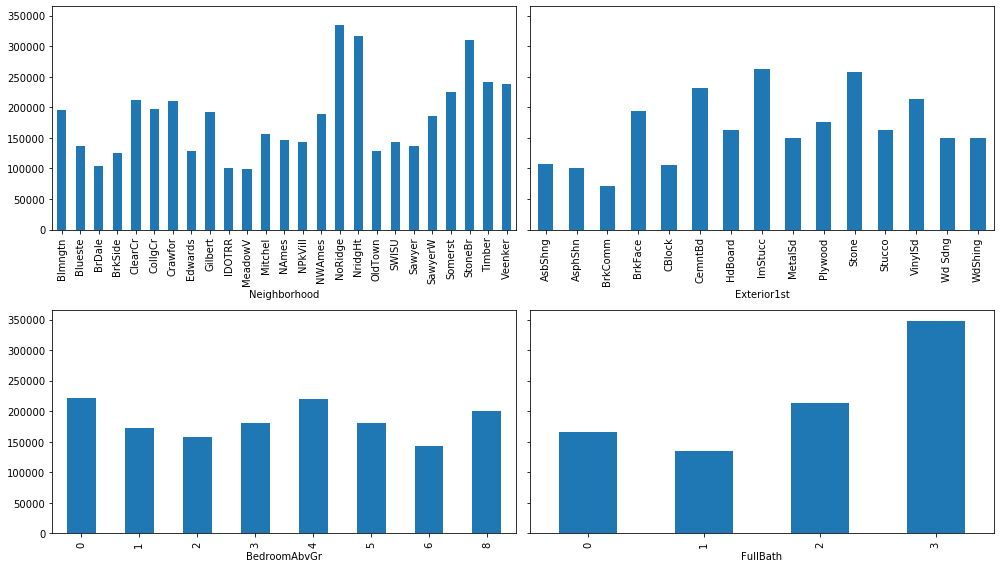

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
for col, ax in zip(categorical_cols, axes.flatten()):
    housing.groupby(col)['SalePrice'].mean().plot(kind='bar', ax=ax)
fig.tight_layout()

Continuous features

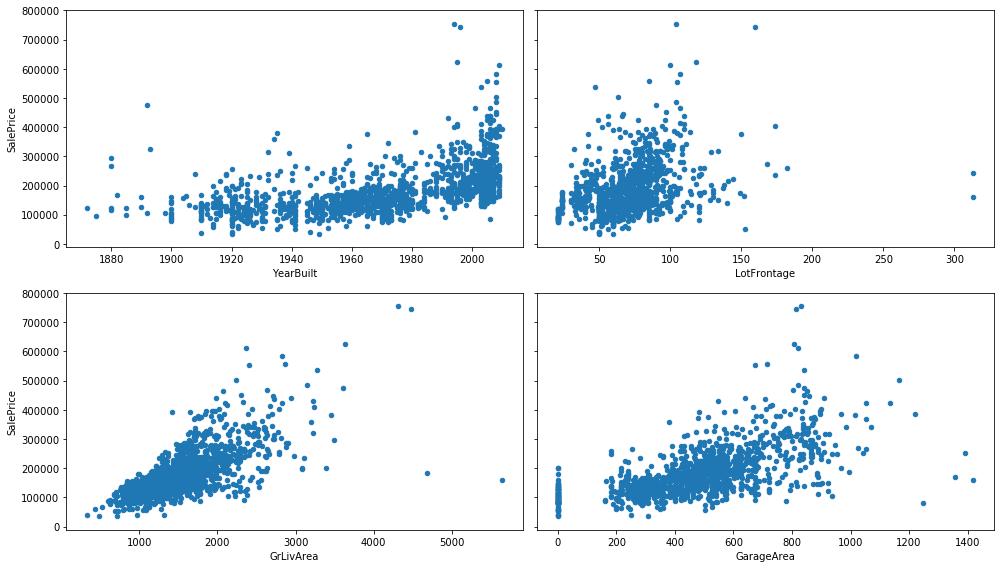

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
for col, ax in zip(continuous_cols, axes.flatten()):
    housing.plot(x=col, y = 'SalePrice', kind='scatter', ax=ax)
fig.tight_layout()

### Multivariate Analysis

In [14]:
pd.crosstab(index=housing['Neighborhood'], columns=housing['FullBath'])

FullBath,0,1,2,3
Neighborhood,,,,
Blmngtn,1,0,16,0
Blueste,0,1,1,0
BrDale,0,13,3,0
BrkSide,0,52,6,0
ClearCr,1,11,14,2
CollgCr,0,38,111,1
Crawfor,0,27,22,2
Edwards,1,66,29,4
Gilbert,0,2,77,0


Average sale price for bedroom and bathroom combination.

In [15]:
housing.pivot_table(index='BedroomAbvGr', columns='FullBath', 
                    values='SalePrice', aggfunc='mean').round(-3)

FullBath,0,1,2,3
BedroomAbvGr,,,,
0,209000.0,286000.0,NaN,NaN
1,48000.0,166000.0,268000.0,NaN
2,174000.0,120000.0,215000.0,NaN
3,NaN,138000.0,214000.0,250000.0
4,NaN,151000.0,212000.0,412000.0
5,NaN,120000.0,185000.0,245000.0
6,NaN,NaN,144000.0,NaN
8,NaN,NaN,200000.0,NaN


Use seaborn to plot regression line of above ground living area vs sale price. Make a separate line for each unique bedroom.

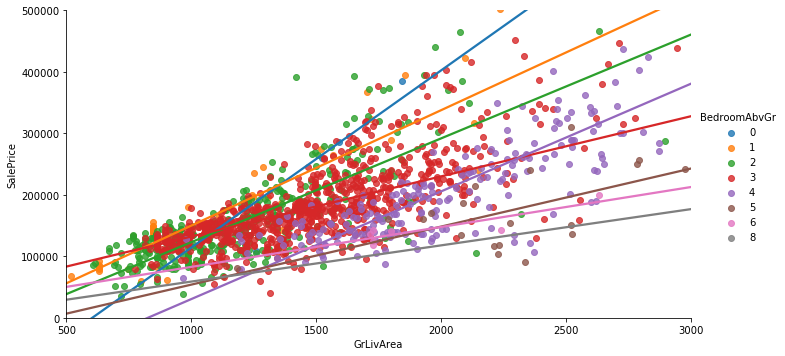

In [16]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=housing, hue='BedroomAbvGr', aspect=2, ci=None) \
   .set(xlim=(500, 3000), ylim=(0, 500000));

In [17]:
gr_bins = pd.cut(housing['GrLivArea'], range(500, 4000, 500))
housing.pivot_table(index='Neighborhood', columns=gr_bins, 
                    values='SalePrice', aggfunc='mean') // 1000

GrLivArea,"(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 2500]","(2500, 3000]","(3000, 3500]"
Neighborhood,,,,,,
Blmngtn,NaN,187.0,203.0,NaN,NaN,NaN
Blueste,NaN,124.0,151.0,NaN,NaN,NaN
BrDale,96.0,110.0,NaN,NaN,NaN,NaN
BrkSide,95.0,120.0,169.0,191.0,NaN,NaN
ClearCr,180.0,181.0,221.0,232.0,NaN,200.0
CollgCr,135.0,185.0,223.0,254.0,361.0,NaN
Crawfor,117.0,159.0,219.0,230.0,236.0,370.0
Edwards,95.0,127.0,146.0,224.0,NaN,NaN
Gilbert,141.0,174.0,197.0,233.0,NaN,NaN


#### Correlation

In [18]:
housing.corrwith(housing['SalePrice']).round(2).sort_values(ascending=False)

SalePrice       1.00
GrLivArea       0.71
GarageArea      0.62
FullBath        0.56
YearBuilt       0.52
LotFrontage     0.35
BedroomAbvGr    0.17
dtype: float64

## Build a simple model without scikit-learn

scikit-learn automates the learning process for you. Instead of beginning with it, I recommend building a simple model without it.

### What are we predicting?
In this problem, we want to predict the final sale price of the house.

### Assign target variable to `y`

In [19]:
y = housing['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Baseline model for regression

One of the simplest models we can build for regression problems is guessing the mean.

In [20]:
y_pred = y.mean()
y_pred

180921.19589041095

### Assess model performance

For each model we build, we will assess its performance. A popular measure of performance for regression problems is the Sum of Squared Error or SSE. This calculation involves three steps:

* Calculate error for each observation - actual - mean
* Square each error
* Sum the errors

#### Step 1: Calculate error

In [21]:
error = y - y_pred
error.head()

0    27578.80411
1      578.80411
2    42578.80411
3   -40921.19589
4    69078.80411
Name: SalePrice, dtype: float64

#### Step 2: Square errors

In [22]:
error_squared = error ** 2
error_squared.head()

0    7.605904e+08
1    3.350142e+05
2    1.812955e+09
3    1.674544e+09
4    4.771881e+09
Name: SalePrice, dtype: float64

#### Step 3: Sum errors

Get a single metric to objectively quantify our model.

In [23]:
model_1_sse = error_squared.sum()
model_1_sse

9207911334609.977

### Model 2 - Use average neighborhood sale price

In [24]:
model_2 = housing.groupby('Neighborhood')['SalePrice'].mean()
model_2.head()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
Name: SalePrice, dtype: float64

In [25]:
y_pred = model_2.loc[housing['Neighborhood']].values.round(-3)
y_pred[:10]

array([198000., 239000., 198000., 211000., 335000., 156000., 225000.,
       189000., 128000., 125000.])

#### Calculate SSE in one step

In [26]:
model_2_sse = ((y - y_pred) ** 2).sum()
model_2_sse

4184399557338.0

### Model 3

In [27]:
housing['GrLivArea'].max()

5642

In [28]:
gr_bins = pd.cut(housing['GrLivArea'], range(0, 6500, 500))
model_3 = housing.groupby(['Neighborhood', gr_bins])['SalePrice'].mean()
model_3.head(20)

Neighborhood  GrLivArea   
Blmngtn       (0, 500]                  NaN
              (500, 1000]               NaN
              (1000, 1500]    187372.666667
              (1500, 2000]    203306.375000
              (2000, 2500]              NaN
              (2500, 3000]              NaN
              (3000, 3500]              NaN
              (3500, 4000]              NaN
              (4000, 4500]              NaN
              (4500, 5000]              NaN
              (5000, 5500]              NaN
              (5500, 6000]              NaN
Blueste       (0, 500]                  NaN
              (500, 1000]               NaN
              (1000, 1500]    124000.000000
              (1500, 2000]    151000.000000
              (2000, 2500]              NaN
              (2500, 3000]              NaN
              (3000, 3500]              NaN
              (3500, 4000]              NaN
Name: SalePrice, dtype: float64

In [29]:
X = housing[['Neighborhood', 'GrLivArea']].itertuples(index=False)
y_pred = model_3[X].values.round(-3)
y_pred[:5]

array([223000., 205000., 223000., 219000., 301000.])

In [30]:
model_3_sse = ((y - y_pred) ** 2).sum()
model_3_sse

1776596603338.0

### Plot errors for simple models

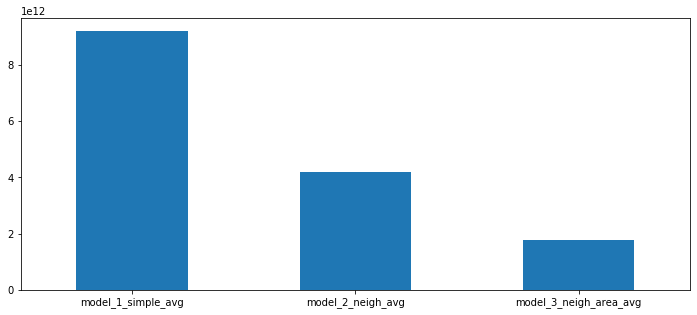

In [31]:
errors = {'model_1_simple_avg': model_1_sse,
          'model_2_neigh_avg': model_2_sse, 
          'model_3_neigh_area_avg': model_3_sse}
pd.Series(errors).plot(kind='bar', figsize=(12, 5), rot=0);

## Machine Learning with scikit-learn

* scikit-learn provides many regression models to learn from data
* The goal of each model is to minimize the squared error 

### Linear Regression

Linear regression is one of the simpler models available in scikit-learn. When learning with a single feature, it's called **simple linear regression**. The form of the model is as follows:

$$\hat{y} = w_{0} + w_{1}x_{1}$$

Where $\hat{y}$ (pronounced y-hat) is the predicted value, $x_1$ is the feature value, and $w_0$ and $w_1$ are the parameters. This is the equation or a line where $w_0$ is the y-intercept and $w_1$ is the slope. 

### Goal of linear regression

The goal of all models is to learn from data. With linear regression, we would like to find the value of the parameters ($w_0$ and $w_1$) that minimize the SSE. Once the values for the parameters are found then the learning is complete.

### Select a single feature to learn from

We'll select above ground living area (`GrLivArea`) as our single feature for our first linear regression model. Let's plot the relationship between it and the sale price as a scatterplot.

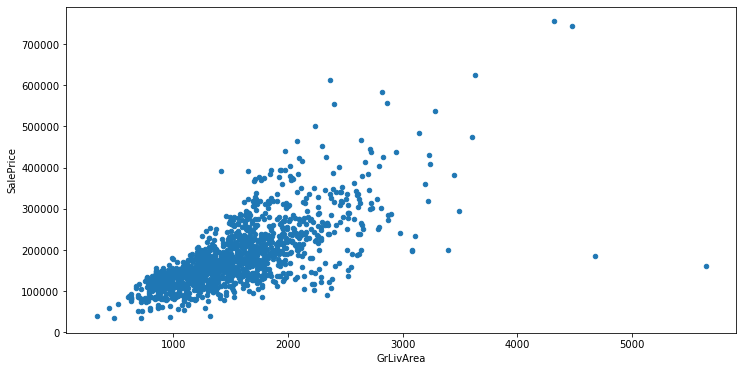

In [32]:
housing.plot(x='GrLivArea', y='SalePrice', kind='scatter', figsize=(12, 6));

### Choose values of parameters by hand

Before using scikit-learn, let's choose a couple different combinations of $w_0$ and $w_1$ and plot the lines and calculate error. First we create a function that makes the predictions for us given the parameters and the feature values.

In [33]:
def lr_predict(w0, w1, x):
    return w0 + w1 * x

Let's use this function to plot two models with different parameter values.

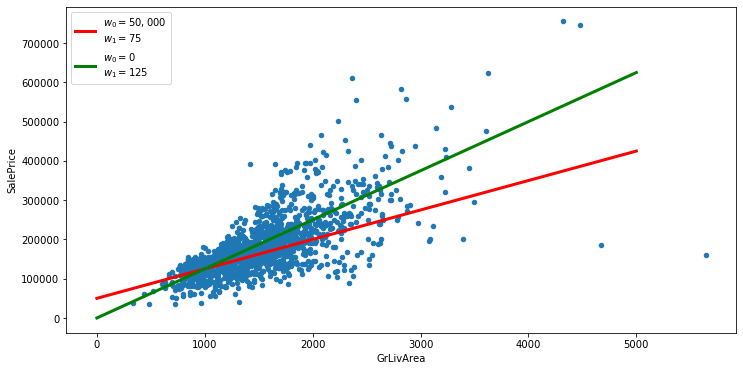

In [34]:
ax = housing.plot(x='GrLivArea', y='SalePrice', kind='scatter', figsize=(12, 6));

# model 1 intercept of 50,000 and slope of 75
x = np.array([[0], [5000]])
w0, w1 = 50_000, 75
ax.plot(x, lr_predict(w0, w1, x), color='red', lw=3, label=f'$w_0={w0:,}$\n$w_1={w1}$')

# model 2 intercept of 0 and slope of 125
w0, w1 = 0, 125
ax.plot(x, lr_predict(w0, w1, x), color='green', lw=3, label=f'$w_0={w0}$\n$w_1={w1}$')
ax.legend();

### Calculate errors for each model

Use root mean squared error (RMSE) instead. This is a very similar metric, but is relative and not absolute. Much smaller and easier to compare.

In [35]:
y_pred = lr_predict(50_000, 75, housing['GrLivArea'])
y_pred.head()

0    178250
1    144650
2    183950
3    178775
4    214850
Name: GrLivArea, dtype: int64

In [36]:
model_1_lr = np.sqrt(((y - y_pred) ** 2).mean()).round()
model_1_lr

61014.0

In [37]:
y_pred = lr_predict(0, 125, housing['GrLivArea'])
model_2_lr = np.sqrt(((y - y_pred) ** 2).mean()).round()
model_2_lr

57449.0

Model two has lowest error and is best.

## The scikit-learn Estimator

We now turn to scikit-learn to automate the learning process. scikit-learn will quickly find us the best combination of linear regression parameter values that minimize the squared error.

scikit-learn uses the term **Estimator** to refer to any object that learns from data. There are several types of estimators that scikit-learn has built for us. Not all estimators are machine learning models, but all of them **learn from data**. Here are the main types of estimators:

* Regressors - Supervised learning with continuous target
* Classifiers - Supervised learning with categorical target
* Clusterers - Unsupervised learning
* Transformers - Transform the input/output data
* Meta-estimators - Learn from other estimators

### Understanding the scikit-learn API

It is instructive to take a glimpse of the scikit-learn API before using it. I like to analogize the API to a house where each of the rooms contains the useful objects for machine learning. Take a look at the scikit-learn 'house' below:

![][1]

[1]: images/scikit_house.png

## Linear regression in scikit-learn

While the above models look reasonable, they do not minimize the squared error. scikit-learn uses an algorithm that guarantees to find the combination of parameters that minimize the SSE.

### Data requirements for scikit-learn

In order to use scikit-learn, the data must be provided in a particular form. Here is how you need to provide your data:

* The input data must be two-dimensional
* The output data can be one-dimensional
* There can be no missing values
* The input data cannot contain strings

### Select feature as a DataFrame and Target as a Series

scikit-learn requires our input data to be two dimensional, even if we are using just a single feature as our input. Below, we select our feature as a DataFrame using a single-item list. By convention, scikit-learn uses the variable names `X` and `y`.

In [38]:
X = housing[['GrLivArea']]
y = housing['SalePrice']
X.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


## Three-step process for all Estimators - Import, Instantiate, Fit

All scikit-learn estimators follow the same three step process:

* Import - find model in scikit-learn 'house'
* Instantiate - create a single instance of the model
* Fit - learn from data

### Step 1: Import

In [40]:
from sklearn.linear_model import LinearRegression

### Step 2: Instantiate

In [41]:
lr = LinearRegression()

### Step 3: Fit

In [42]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Get the model

After calling the `fit` method, the model is trained. We can find the optimal parameter values by accessing the `intercept_` and `coef_` attributes.

In [43]:
lr.intercept_

18569.02585648722

In [44]:
lr.coef_

array([107.13035897])

### Make predictions with the `predict` method

In [45]:
lr.predict([[1500]])

array([179264.56430523])

### Make predictions on all input data

In [46]:
y_pred = lr.predict(X).round(-3)
y_pred[:5]

array([202000., 154000., 210000., 203000., 254000.])

### Plot best model

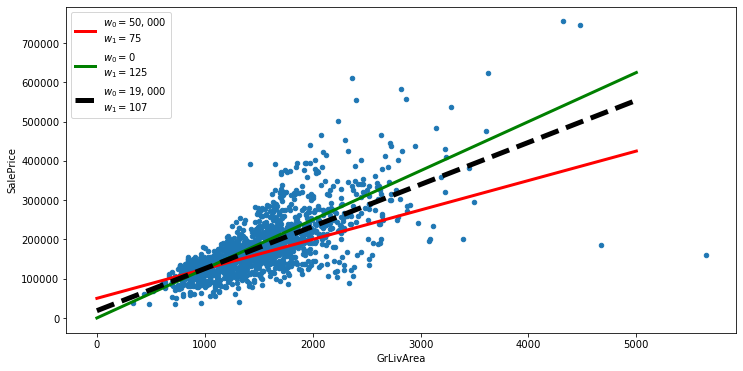

In [47]:
ax = housing.plot(x='GrLivArea', y='SalePrice', kind='scatter', figsize=(12, 6))

# model 1 intercept of 50,000 and slope of 75
x = np.array([[0], [5000]])
w0, w1 = 50_000, 75
ax.plot(x, lr_predict(w0, w1, x), color='red', lw=3, label=f'$w_0={w0:,}$\n$w_1={w1}$')

# model 2 intercept of 0 and slope of 125
w0, w1 = 0, 125
ax.plot(x, lr_predict(w0, w1, x), color='green', lw=3, label=f'$w_0={w0}$\n$w_1={w1}$')

# LinearRegression in scikit-learn
y_pred = lr.predict(x)
w0 = lr.intercept_.round(-3)
w1 = lr.coef_[0]
ax.plot(x, y_pred, color='black', lw=5, ls='--', label=f'$w_0={w0:,.0f}$\n$w_1={w1:.0f}$')
ax.legend();

### Assessing model performance - $R^2$

scikit-learn uses, $R^2$, a slightly different metric as its default for model performance. Here is the procedure for calculating $R^2$

* Find the SSE of the model
* Find the SSE when guessing the mean
* $R^2$ is the percentage decrease in the SSE when guessing the mean versus the SSE of the model.

### Calculate $R^2$ by hand

In [48]:
y_pred_model = lr.predict(X)
y_pred_mean = y.mean()

In [49]:
sse_model = ((y - y_pred_model) ** 2).sum()
sse_model

4584171086113.13

In [50]:
sse_mean = ((y - y_pred_mean) ** 2).sum()
sse_mean

9207911334609.977

In [51]:
r2 = 1 - sse_model / sse_mean
r2

0.5021486502718042

### Use score method to calculate $R^2$

All regression estimators have a `score` method that returns the $R^2$. Let's verify that it's the same.

In [52]:
lr.score(X, y)

0.5021486502718042

### Visualizing $R^2$

Best possible score is 1.

![][0]

[0]: images/r2_matplotlib.png

### $R^2$ - percent variance explained

The SSE when guessing the mean is also the definition of the statistical variance (multiplied by the number of observations). Therefore, the SSE of the model is the percentage decrease in this variance. The variance is the natural variation of the target. We are interested in understanding why it varies. Why isn't the target the same for every input? We use a model to explain this variance. We'd like to explain all of the variance. The metric $R^2$ informs us of how much this natural inherent variance has been removed.

## Exercise

Instantiate a new `LinearRegression` estimator and use a different feature to learn from. Output the parameter values and the $R^2$ score.

## Multiple Linear Regression

Use more than one predictor variable. New model:

$$\hat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{p}x_{p}$$

Where `p` is the number of predictor variables (features).

### Select multiple columns

In [53]:
cols = ['GrLivArea', 'GarageArea', 'FullBath']
X = housing[cols]
X.head()

,GrLivArea,GarageArea,FullBath
0,1710,548,2
1,1262,460,2
2,1786,608,2
3,1717,642,1
4,2198,836,2


### Train the model again - no need to import

Since we already imported the `LinearRegression` class, we can straight to step 2.

In [54]:
lr2 = LinearRegression()

Fit with new data.

In [55]:
lr2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Get learned model

In [56]:
lr2.intercept_

-15836.576952616451

In [57]:
lr2.coef_

array([   70.0661081 ,   132.12662295, 17942.89605841])

### Model interpretation

For every one unit increase in the feature, a corresponding increase of the parameter value is expected in the target (many assumptions).

### Score new model

In [58]:
lr2.score(X, y)

0.6198706918364121

## Other ML models - Back at the scikit-learn house

![][0]

[0]: images/scikit_house.png

## K-Nearest Neighbors

K-Nearest neighbors (KNN) provides a completely different approach to learning from data. KNN finds the most similar observations to the one being predicted. It then averages the target variable for all of these similar neighbors to make a prediction. You must supply it a value, `k`, for the number of neighbors you would like to find.

### Visualizing KNN

The below function accepts a value for an above ground living area, garage area, and number of neighbors. It then calculates the distance between the provided values and all other values in the dataset. The k nearest neighbors are found based on this distance calculation. The average sales price of these five neighbors is returned.

In [59]:
def plot_neighbors(sq_foot, sq_foot_garage, k):
    df = housing[['GrLivArea', 'GarageArea', 'SalePrice']].copy()
    df['distance'] = np.sqrt((df['GrLivArea'] - sq_foot) ** 2 + (df['GarageArea'] - sq_foot_garage) ** 2)
    df_neighbors = df.nsmallest(k, 'distance')
    mean = df_neighbors['SalePrice'].mean()
    ax = df.plot(x='GrLivArea', y='GarageArea', kind='scatter', figsize=(14, 6))
    df_neighbors.plot(x='GrLivArea', y='GarageArea', kind='scatter', color='red', ax=ax, label=f'{k} neighbors')
    ax.scatter([sq_foot], [sq_foot_garage], color='green', s=40, label='Predicted Value')
    ax.set_title(f'{k} nearest neighbors of {sq_foot} square feet and {sq_foot_garage} '
                 f'basement square feet predict sale price of {mean}')
    ax.legend()

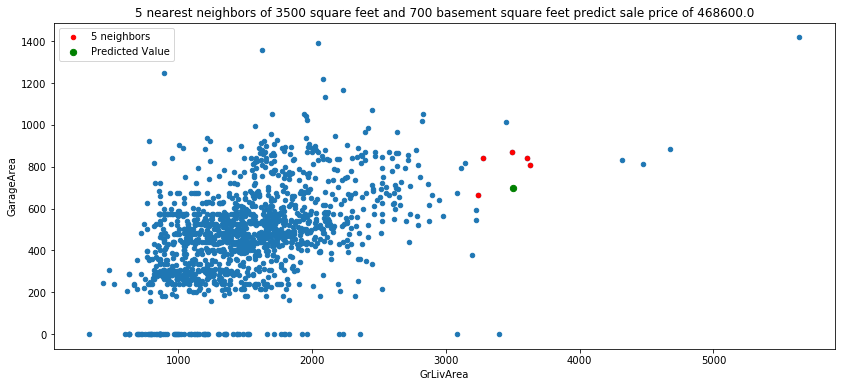

In [60]:
plot_neighbors(3500, 700, 5)

### KNN in scikit-learn

The `KNeighborsRegressor` estimator from the `neighbors` module is available in scikit-learn to do KNN. Just like all estimators, it follows the same three-step process - import, instantiate, fit. When we instantiate it, we set the number of neighbors with the `n_neighbors` parameter. All three steps are completed in a single cell. We select the same features as the plot above.

In [61]:
cols = ['GrLivArea', 'GarageArea']
X = housing[cols]

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### Prediction

In [63]:
knr.predict([[3500, 700]])

array([468600.])

### Score

By default, all scikit-learn regression estimators use $R^2$ as their evaluation metric in the `score` method.

In [64]:
knr.score(X, y)

0.723809534917851

## Decision Trees

Decision trees are one of the more interpretable models (when not so deep) and are composed of:

* Nodes - where a binary decision is made
* Branches - lead you to the next node (decision)
* Leaves - bottom of the tree, where prediction is

![][0]



[0]: images/tree.png

### Decision trees in scikit-learn

The `DecisionTreeRegressor` estimator from the `tree` module learns a decision tree in scikit-learn. Let's use a different set of columns.

In [65]:
cols = ['BedroomAbvGr', 'FullBath']
X = housing[cols]
X.head()

,BedroomAbvGr,FullBath
0,3,2
1,3,2
2,3,2
3,3,1
4,4,2


Follow the same three step process. Set the maximum depth of the tree with the `max_depth` parameter.

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Make predictions and score

In [67]:
dtr.score(X, y)

0.3417103629521596

In [68]:
dtr.predict(X).round(-3)[:5]

array([213000., 213000., 213000., 133000., 213000.])

### Visualizing the decision tree

You'll need to install the graphviz library with `conda install graphviz`.

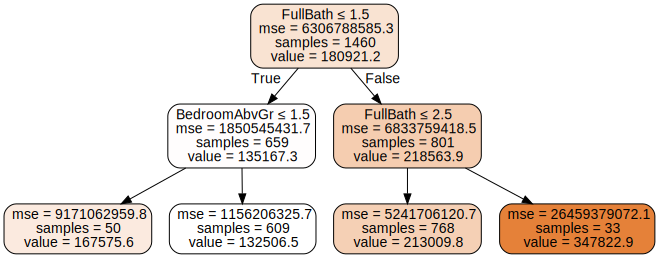

In [69]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtr, out_file=None, feature_names=cols, precision=1,
                           filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data, format='png')  
graph

### Get nearly a perfect score

Decision trees are very flexible models and can provide a nearly perfect fit to the data it is trained on. Let's build a new decision on a different set of features.

In [70]:
cols = ['GrLivArea', 'GarageArea', 'FullBath']
X = housing[cols]
X.head()

,GrLivArea,GarageArea,FullBath
0,1710,548,2
1,1262,460,2
2,1786,608,2
3,1717,642,1
4,2198,836,2


If we do not set the `max_depth` parameter, then there will be no limit to how deep the tree can grow. It will grow until only a single observation remains in each node. With no limit to it's depth, we get nearly a perfect score.

In [71]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
dtr.score(X, y)

0.9986089580386318

## Model evaluation

Thus far, we've evaluated ourselves on the data that the model was trained on. Instead, we must evaluate ourselves on unseen data. One procedure for proper evaluation is cross validation.

* Divide data into `k` equal partitions
* Train a model on `k - 1` partitions
* Evaluate the model on the 1 partition not used during training
* Record the score on that 1 partition
* Repeat process using a different partition for evaluation
* Continue until all partitions have been used for evaluation

Many different flavors of cross validation. This procedure is called K-fold cross validation where the 'fold' is a partition of the data and 'k' is the number of these partitions. This value is usually between 5 and 10.

![][0]

[0]: images/kfold.png

### Cross validation in scikit-learn

The `cross_val_score` function automates the entire procedure for us. Pass it the instantiated estimator, input and output data and set, and the number of folds with the `cv` parameter.

In [72]:
cols = ['GrLivArea', 'GarageArea', 'FullBath']
X = housing[cols]
X.head()

,GrLivArea,GarageArea,FullBath
0,1710,548,2
1,1262,460,2
2,1786,608,2
3,1717,642,1
4,2198,836,2


In [73]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
scores_lr = cross_val_score(lr, X, y, cv=5).round(2)
scores_lr

array([0.7 , 0.64, 0.65, 0.59, 0.49])

In [76]:
scores_dtr = cross_val_score(dtr, X, y, cv=5).round(2)
scores_dtr

array([0.38, 0.25, 0.46, 0.24, 0.54])

### Cross validation approximates our future performance

We want to know how well our model performs in the future. Cross validation is a procedure for approximating this future performance.

## Tune Hyperparameters with grid-search

All models have hyperparameters that change the behavior of the model. These are set during instantiation in step 2. Hyperparameters are NOT learned during training. They are set by you. You choose what they are. Depending on the model, these hyperparameters can drastically change the performance of the model. Decision trees are heavily influenced by their hyperparameter values. 

### Using the `GridSearchCV` metaestimator

Instead of manually iterating over different combinations of hyperparameters, scikit-learn provides the meta-estimator `GridSearchCV` to automate the process for us. To use it, you must create a grid using a dictionary mapping the hyperparameter name as a string to the possible values (as a list or array).

In [77]:
grid = {'max_depth':[3, 5, 10, 20],
        'min_samples_leaf':[5, 10, 50]}

The same three-step process exists for meta-estimators. We import it and instantiate it by passing it the instantiated model, the grid, and the number of folds.

In [78]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dtr, grid, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 50]},
             pre_dispatch='2*n_jobs', refi

### Grid search results

In [79]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 5}

In [80]:
gs.best_score_

0.6223242123531567

See all results at once:

In [81]:
df_results = pd.DataFrame(gs.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002732,0.000187,0.001557,0.000171,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.524495,0.543855,0.506469,0.552781,0.530325,0.531585,0.016015,11
1,0.002549,0.000059,0.001620,0.000168,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.524495,0.543855,0.506469,0.552781,0.530325,0.531585,0.016015,11
2,0.002503,0.000190,0.001447,0.000071,3,50,"{'max_depth': 3, 'min_samples_leaf': 50}",0.614029,0.574580,0.505662,0.548891,0.499021,0.548436,0.043029,10
3,0.003002,0.000120,0.001510,0.000079,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",0.704052,0.600415,0.572141,0.598719,0.636294,0.622324,0.045673,1
4,0.003104,0.000358,0.001516,0.000122,5,10,"{'max_depth': 5, 'min_samples_leaf': 10}",0.656939,0.570901,0.587735,0.619071,0.583329,0.603595,0.031036,2
5,0.002576,0.000075,0.001431,0.000066,5,50,"{'max_depth': 5, 'min_samples_leaf': 50}",0.670332,0.604162,0.539797,0.574193,0.536595,0.585016,0.049299,7
6,0.003445,0.000153,0.001613,0.000173,10,5,"{'max_depth': 10, 'min_samples_leaf': 5}",0.674382,0.571107,0.612693,0.498486,0.609595,0.593253,0.057790,3
7,0.003083,0.000070,0.001441,0.000055,10,10,"{'max_depth': 10, 'min_samples_leaf': 10}",0.623878,0.557093,0.611739,0.589749,0.544556,0.585403,0.030538,6
8,0.002536,0.000081,0.001386,0.000029,10,50,"{'max_depth': 10, 'min_samples_leaf': 50}",0.669952,0.605753,0.539797,0.575718,0.537750,0.585794,0.049003,4
9,0.003250,0.000016,0.001381,0.000028,20,5,"{'max_depth': 20, 'min_samples_leaf': 5}",0.649848,0.557237,0.607775,0.493154,0.611010,0.583805,0.054037,9


In [82]:
df_results.pivot(index='param_max_depth', columns='param_min_samples_leaf', 
                 values='mean_test_score').round(3).style.background_gradient('coolwarm', axis=None)

param_min_samples_leaf,5,10,50
param_max_depth,,,
3,0.532,0.532,0.548
5,0.622,0.604,0.585
10,0.593,0.585,0.586
20,0.584,0.584,0.586
